2*( binom.pmf(12, 15, 0.5) + binom.pmf(13, 15, 0.5)+ binom.pmf(14, 15, 0.5)+ binom.pmf(15,15, 0.5))
If it is smaller than the p-value, then reject H0


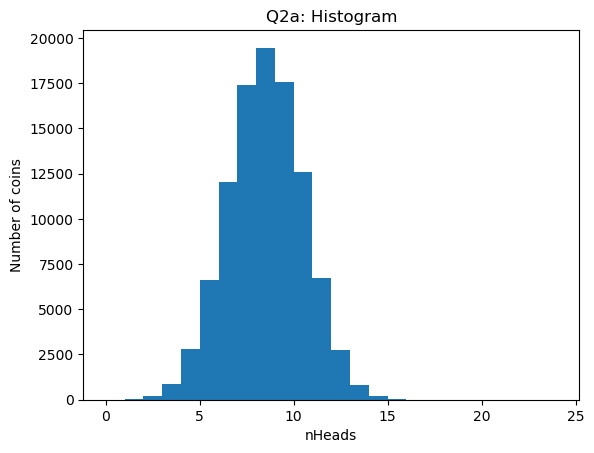

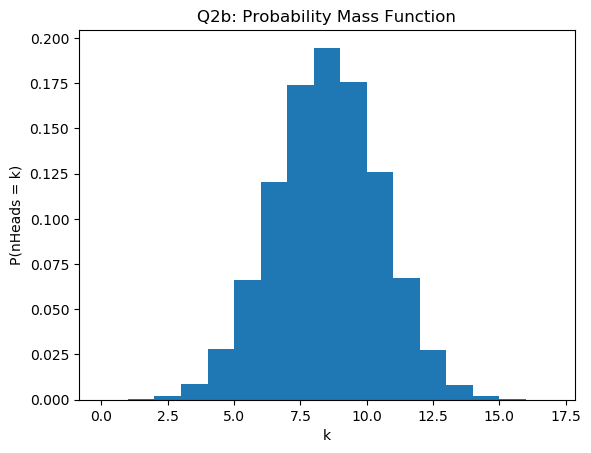

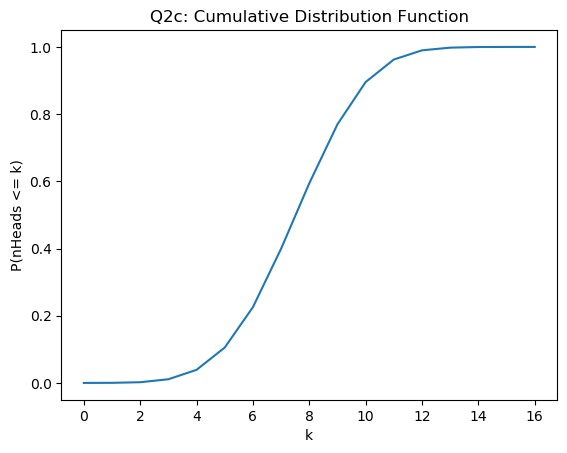

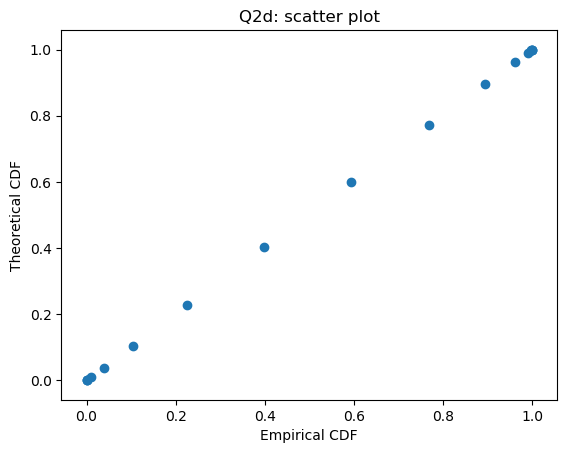

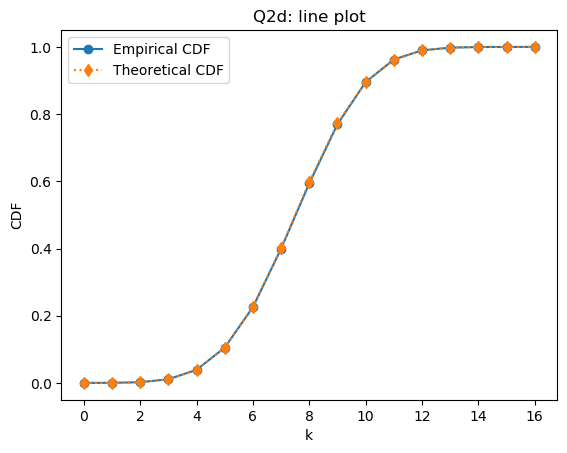

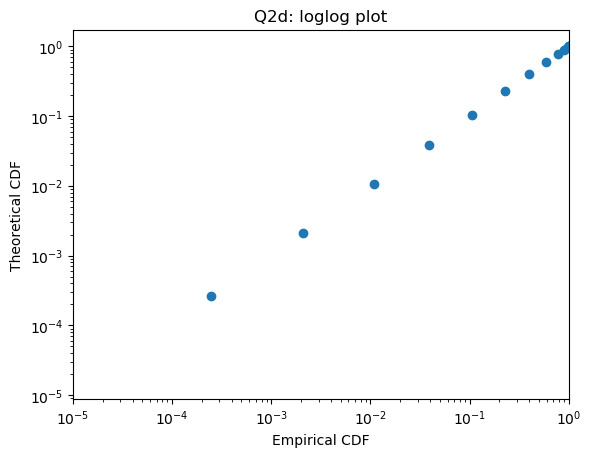

Slope β = 8.4
Intercept α = -16830.399999999998
Y           = [11.6 20.  28.4 36.8 45.2]


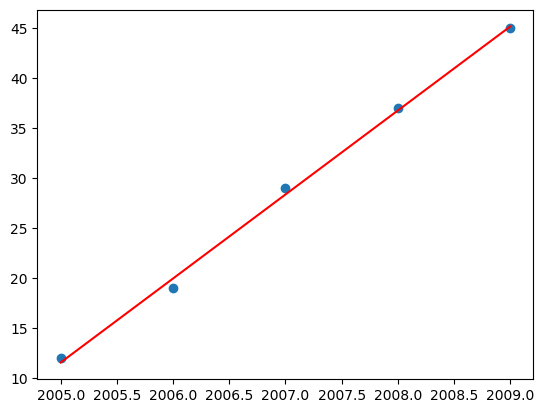

Estimated sales in 2012 is  70.40000000000146


In [9]:
#%% import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pdb


#%% Q1
#Q1a: 15 pts, just output the formula directly
print( "2*( binom.pmf(12, 15, 0.5) + binom.pmf(13, 15, 0.5)+ binom.pmf(14, 15, 0.5)+ binom.pmf(15,15, 0.5))")
#Q1b: 5 pts, just output either 'accept' or 'reject'
print("If it is smaller than the p-value, then reject H0")

#%% Q2 setup, 60pts
import scipy.stats as stats
import numpy.random as rn
#%% Q2a, 15pts
rn.seed(0)

N = 16;

m = 10**5;

# 10**5 by 16 = 16 + 16 + ... + 16
# use the uniform or binomial functions to generate the data
nHeads = (rn.uniform(size=(m, N))>0.5).sum(1)
plt.hist(nHeads, bins=range(18))
plt.xlabel('nHeads')
plt.ylabel('Number of coins')
plt.title('Q2a: Histogram')
plt.show()

#%% Q2b, 10pts
counts=plt.hist(nHeads, bins=range(18), density=True)
plt.xlabel('k')
plt.ylabel('P(nHeads = k)')
plt.title('Q2b: Probability Mass Function')
plt.show()

#%% Q2c, 15pts
#Use the values of counts returned from a or b. 
#Use the function cumsum to get the CDF.
# Do not use scipy.stats.binom
ecdf = np.cumsum(counts[0]) #or you can calculate it by yourself
#pdb.set_trace()
plt.plot(counts[1][:-1], ecdf)
plt.xlabel('k')
plt.ylabel('P(nHeads <= k)')
plt.title('Q2c: Cumulative Distribution Function')
plt.show()


#%% Q2d, 20pts
# Use the binomial distribution CDF (use scipy.stats.binom.cdf)

tcdf = stats.binom.cdf(range(17), 16, 0.5)


plt.scatter(ecdf, tcdf)
plt.xlabel('Empirical CDF')
plt.ylabel('Theoretical CDF')
plt.title('Q2d: scatter plot')
plt.show()


plt.plot(range(17), ecdf, '-o', range(17), tcdf, ':d')
plt.legend(('Empirical CDF', 'Theoretical CDF'))
plt.xlabel('k')
plt.ylabel('CDF')
plt.title('Q2d: line plot')
plt.show()


plt.loglog(ecdf, tcdf, 'o')
plt.xlim(10**-5, 1)
plt.xlabel('Empirical CDF')
plt.ylabel('Theoretical CDF')
plt.title('Q2d: loglog plot')
plt.show()

##Q3a, 15 pts
x_year= np.array([2005,2006,2007,2008,2009])
y_sales= np.array([12,19,29,37,45])
model = linear_model.LinearRegression()
model.fit(x_year.reshape(-1,1),y_sales.reshape(-1,1))
print('Slope β =', model.coef_[0][0])
print('Intercept α =', model.intercept_[0])

# the plot is not required
yPrediction = (model.coef_ * x_year) + model.intercept_
print('Y           =', yPrediction[0])
plt.scatter(x_year, y_sales)
plt.plot(x_year,yPrediction.reshape(-1,1), color = 'r')
plt.show()

#%%Q3b, 5 pts
estimate = model.coef_ * 2012 + model.intercept_
print('Estimated sales in 2012 is ', estimate[0][0])

